# Gender Recognition From Vocal Data

In [29]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import layers, models
import pickle

In [3]:
data = pd.read_csv("voice.csv")

In [ ]:
data.shape

 There are total 3168 rows and 21 cols in the dataset

In [ ]:
data

<img> 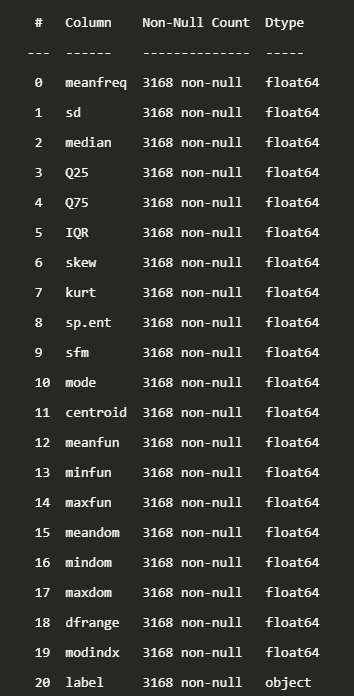</img>

### As we can see there are no null values in the data set 
### All the cols are numerical and the last col is categorical which signifies that is the male or female col

### We pretty much dont need to pre process the dataset as the data is well made and all the values are perfect

## Encoding Labels

### We are changing the data where males are given -- 1 and the females are given --- 0 so that we can test and train our model based of all the numeraical values

In [11]:
enc = LabelEncoder()
data['label'] = enc.fit_transform(data['label'])

In [12]:
dict(enumerate(enc.classes_))

{0: 'female', 1: 'male'}

In [13]:
data

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,0
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,0
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,0
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,0


## Split and Scaling

In [14]:
y = data['label'].copy()
x = data.drop('label',axis=1).copy()

In [16]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

### classfied into train and test data the train data is 90 and the random_state is 30

In [18]:
xtrain , xtest , ytrain , ytest = train_test_split(x,y,train_size=0.9,random_state=30)

### Model Traning

In [20]:
inputs = tf.keras.Input(shape=(x.shape[1],))
x = tf.keras.layers.Dense(64,activation='relu')(inputs)
x = tf.keras.layers.Dense(64,activation='relu')(x)

outputs = tf.keras.layers.Dense(1,activation = 'sigmoid')(x)
model = tf.keras.Model(inputs,outputs)

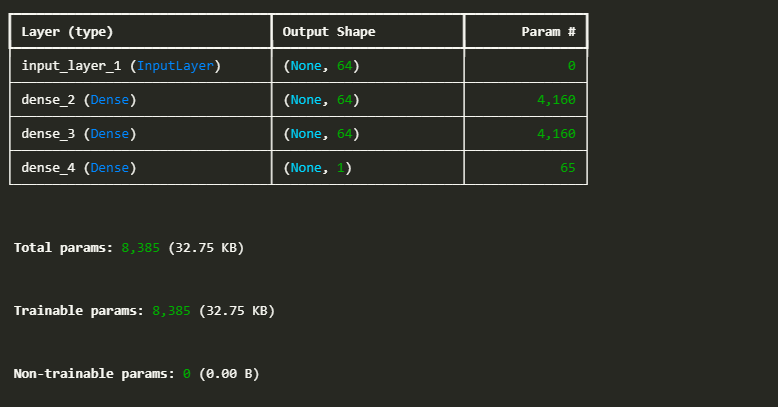

In [27]:


# Define the model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(20,)),  # Match input shape to xtrain
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # For binary classification
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)

# Fit the model
history = model.fit(
    xtrain,
    ytrain,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_auc',
            patience=3,
            restore_best_weights=True
        )
    ]
)


Epoch 1/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6553 - auc: 0.7230 - loss: 0.5775 - val_accuracy: 0.9370 - val_auc: 0.9820 - val_loss: 0.2259
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9567 - auc: 0.9921 - loss: 0.1687 - val_accuracy: 0.9597 - val_auc: 0.9925 - val_loss: 0.1151
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9727 - auc: 0.9966 - loss: 0.0877 - val_accuracy: 0.9632 - val_auc: 0.9933 - val_loss: 0.1025
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9814 - auc: 0.9975 - loss: 0.0646 - val_accuracy: 0.9720 - val_auc: 0.9944 - val_loss: 0.0885
Epoch 5/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9750 - auc: 0.9970 - loss: 0.0666 - val_accuracy: 0.9720 - val_auc: 0.9950 - val_loss: 0.0872
Epoch 6/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9833 - auc: 0.9982 - loss: 0.0479 - val_accuracy: 0.9737 - val_auc: 0.9948 - val_loss: 0.0846
Epoch 7/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/

In [28]:
model.evaluate(xtest,ytest)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9927 - auc: 0.9986 - loss: 0.0384 


[0.06030252203345299, 0.9842271208763123, 0.9974902272224426]

### We got the accuracy of 99% and auc of 99% 

In [30]:
with open("model.pkl", "wb") as file:
    pickle.dump(model, file)